<a href="https://colab.research.google.com/github/skylaanne/skylaanne/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import sqlite3

conn = sqlite3.connect('Employee.db')  # Create Employee Database
c = conn.cursor()

# Create table - Employees
c.execute('''CREATE TABLE IF NOT EXISTS Employees
             ([id] INTEGER PRIMARY KEY, [name] text, [ticket_count] INTEGER, [role] text)''')
conn.commit()

c.execute('''INSERT INTO Employees VALUES
(1, 'Ted', 0, 'Miscellaneous'),
(2, 'Peter', 0, 'Administrative rights'),
(3, 'Brittney', 0, 'Purchase'),
(4, 'Lisa', 0, 'HR Support'),
(5, 'Daniel', 0, 'Access'),
(6, 'Allison', 0, 'Hardware')''')
conn.commit()

employeeTable = c.execute('''SELECT * FROM Employees''')
rows = employeeTable.fetchall()
rows

[(1, 'Ted', 0, 'Miscellaneous'),
 (2, 'Peter', 0, 'Administrative rights'),
 (3, 'Brittney', 0, 'Purchase'),
 (4, 'Lisa', 0, 'HR Support'),
 (5, 'Daniel', 0, 'Access'),
 (6, 'Allison', 0, 'Hardware')]

In [33]:
import sqlite3

ticketdb = sqlite3.connect('Ticket.db')  # Create Employee Database
ticketc = ticketdb.cursor()  # Create Employee Database
# Create table - Tickets
ticketc.execute('''CREATE TABLE IF NOT EXISTS Tickets
             ([id] INTEGER PRIMARY KEY, [title] TEXT, [ticket_type] TEXT, [assignee] TEXT,[summary] TEXT, [creation_time] REAL, [auto] TEXT)''')
ticketdb.commit()


In [4]:
import pandas as pd
import io
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt

trainData = pd.read_csv("/content/sample_data/all_tickets_processed_improved.csv")
testData = pd.read_csv("/content/sample_data/Test.csv")

tfidf_transformer = TfidfVectorizer()
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(trainData.Document, trainData.Topic_group)
# Predic off testing data
labels = model.predict(testData.Document)

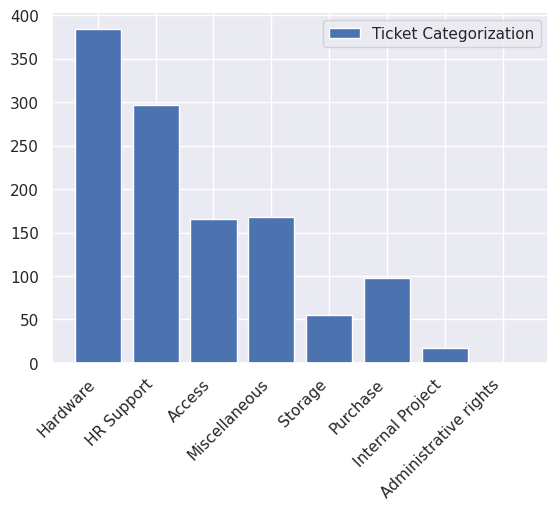

In [5]:
import matplotlib.pyplot as plt

typeAndCount = {'Hardware' : 0 , 'HR Support' : 0, 'Access' : 0, 'Miscellaneous' : 0, 'Storage' : 0, 'Purchase' : 0, 'Internal Project' : 0, 'Administrative rights' :0}

for item in labels:
  it = typeAndCount.get(item)
  it += 1
  typeAndCount[item] = it

x = list(typeAndCount.keys())
y = list(typeAndCount.values())
plt.bar(x, y, label="Ticket Categorization", color='b')
plt.plot()

# Rotate and align the y-axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.gcf().subplots_adjust(bottom=0.15)
plt.legend()
plt.show()


Text(109.44999999999996, 0.5, 'predicted label')

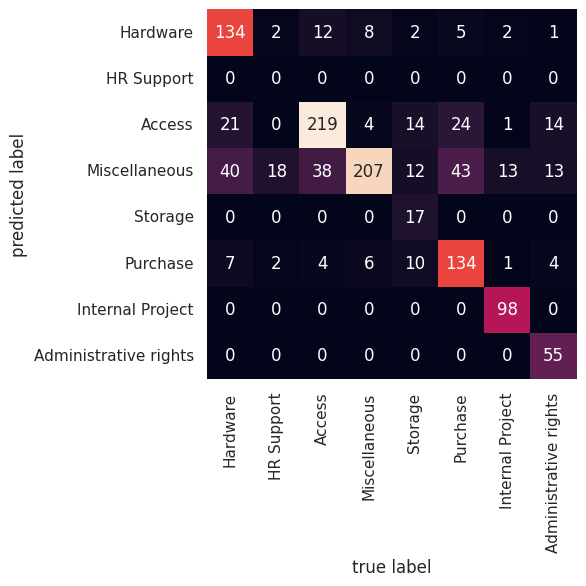

In [6]:
# Display Confusion Matrix on Testing Results
from sklearn.metrics import confusion_matrix
targetNames = ['Hardware', 'HR Support', 'Access', 'Miscellaneous', 'Storage', 'Purchase', 'Internal Project', 'Administrative rights']
matrix = confusion_matrix(testData.Topic_group, labels)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=targetNames, yticklabels=targetNames)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [34]:
# Add tickets
import time
import random
import sqlite3

autoOrManual =  input("Would you like to input the ticket using auto or manual?")

while (autoOrManual != "manual" or autoOrManual != "auto"):
  autoOrManual =  input("Invalid ticket option. Please enter auto or manual:")


if(autoOrManual == "manual"):
    targetNames = ['Hardware', 'HR Support', 'Access', 'Miscellaneous', 'Storage', 'Purchase', 'Internal Project', 'Administrative rights']
    employeedb = sqlite3.connect('Employee.db')
    employeec = employeedb.cursor()

    employeeTable = employeec.execute('''SELECT * FROM Employees''')
    employeeNames = employeeTable.fetchall()
    empNames = []
    for item in employeeNames:
      empNames.append(item[1])

    ticketdb = sqlite3.connect('Ticket.db')
    ticketc = ticketdb.cursor()

    ticketTable = ticketc.execute('''SELECT id FROM Tickets''')
    rows = ticketTable.fetchall()
    id = random.randint(0,1000)
    while id in rows:
      id = random.randint(0,1000)

    starttime = time.time()

    ticketSummary =  input('Enter ticket summary: ')
    ticketTitle = input('Enter ticket title: ')

    ticketAssignee = input('Enter ticket assignee: ')
    while ticketAssignee not in empNames:
      ticketAssignee = input('Invalid assignee, Try again. Enter ticket assignee: ')

    ticketType = input('Enter ticket type: ')
    while ticketType not in targetNames:
      ticketType = input('Invalid Ticket Type, Try again. Enter ticket type: ')

    totaltime = time.time() - starttime

    ticketsTableInput = f'''INSERT INTO Tickets VALUES({id}, '{ticketTitle}', '{ticketType}', '{ticketAssignee}', '{ticketSummary}', {totaltime}, 'false')'''
    if(ticketType in targetNames):
       ticketc.execute(ticketsTableInput)
       ticketdb.commit()
   else:
        ticketdb = sqlite3.connect('Ticket.db')
        ticketc = ticketdb.cursor()

        ticketTable = ticketc.execute('''SELECT id FROM Tickets''')
        rows = ticketTable.fetchall()
        id = random.randint(0,1000)
        while id in rows:
          id = random.randint(0,1000)

        starttime = time.time()
        ticketSummary =  input('Enter ticket summary: ')
        ticketTitle = input('Enter ticket title: ')
        ticketSummaryFile = open("/content/sample_data/userInput.csv", "w")
        ticketSummaryFile.write(ticketSummary)
        ticketSummaryFile = open("/content/sample_data/userInput.csv", "r")

        # Predict ticket category
        ticketType = model.predict(ticketSummaryFile)

        print(f'You entered the ticket summary as: {ticketSummary}. \nThe model is categorizing this ticket as a {ticketType} ticket.')

        okTicketType = input('Would you like to modify the ticket type?')
        if(okTicketType == "yes"):
          ticketType = input('What is the ticket type?')

        employeedb = sqlite3.connect('Employee.db')  # Create Employee Database
        employeec = employeedb.cursor()

        employeeTable = employeec.execute('''SELECT * FROM Employees''')
        rows = employeeTable.fetchall()
        empId = None
        empName = None
        lowestTicketCount = 10000
        for emp in rows:
          if(emp[3] == ticketType):
            if(emp[2] < lowestTicketCount):
              lowestTicketcount = emp[2]
              empId = emp[0]
              empName = emp[1]


        okTicketAsignee = input(f'Assignee picked: {empName} Would you like to modify the assignee?')
        if(okTicketAsignee == "yes"):
          empName = input('What is the correct assignee?')


        totaltime = time.time() - starttime
        ticketType = f'''{ticketType}'''
        ticketType = ticketType.replace("]", "")
        ticketType = ticketType.replace("[", "")
        ticketType = ticketType.replace("'", "")

        ticketsTableInput = f'''INSERT INTO Tickets VALUES({id}, '{ticketTitle}', '{ticketType}', '{empName}', '{ticketSummary}', {totaltime}, 'true')'''

        ticketc.execute(ticketsTableInput)
        ticketdb.commit()

Enter ticket summary: Testing Ticket Summary
Enter ticket title: Testing Ticket Title
Enter ticket assignee: Susan
Enter ticket type: HR support
Invalid Ticket Type, Try again. Enter ticket type: HR Support
Invalid assignee, Try again. Enter ticket assignee: Lisa


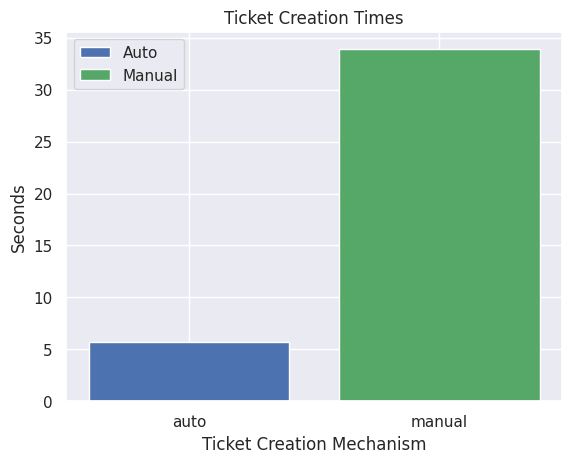

In [58]:
import sqlite3
import matplotlib.pyplot as plt

ticketdb = sqlite3.connect('Ticket.db')
ticketc = ticketdb.cursor()

ticketTable = ticketc.execute('''SELECT * FROM Tickets''')
rows = ticketTable.fetchall()

autoTimes = []
manualTimes =[]

for item in rows:
  auto = item[6]
  if(auto == "true"):
    autoTimes.append(item[5])
  else:
    manualTimes.append(item[5])


x1  = ["auto"]
x2 = ["manual"]
y1 = autoTimes
y2 = manualTimes

plt.bar(x1, y1, label="Auto", color='b')
plt.bar(x2, y2, label="Manual", color='g')
plt.plot()

plt.xlabel("Ticket Creation Mechanism")
plt.ylabel("Seconds")
plt.title("Ticket Creation Times")
plt.legend()
plt.show()